In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report


import warnings
warnings.filterwarnings("ignore") 


In [2]:
#load the data
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
import sweetviz as sv
#get a sweet report with detail analysis
my_report = sv.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
df.shape

(400, 26)

In [5]:
#after looking at the report we see quite a lot of missing values. We decide to drop them
clean_df=df.dropna()
clean_df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [6]:
clean_df.shape

(158, 26)

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    obj

In [8]:
#converting the object type to neccessary data types

clean_df['pcv']=clean_df['pcv'].astype('float')
clean_df['wc']=clean_df['wc'].astype('float')
clean_df['rc']=clean_df['rc'].astype('float')


In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    float64
 17  wc              158 non-null    flo

In [10]:
#convert all categorical object types to numerical values using label encoder from sklearn

le=LabelEncoder()

for i in clean_df.columns:
    if clean_df[i].dtype=='object':
        clean_df[i]=le.fit_transform(clean_df[i])
clean_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32.0,4500.0,3.8,1,1,0,1,1,0,0
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16.0,11000.0,2.6,1,1,1,1,1,0,0
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24.0,9200.0,3.2,1,1,1,1,1,1,0


<AxesSubplot:>

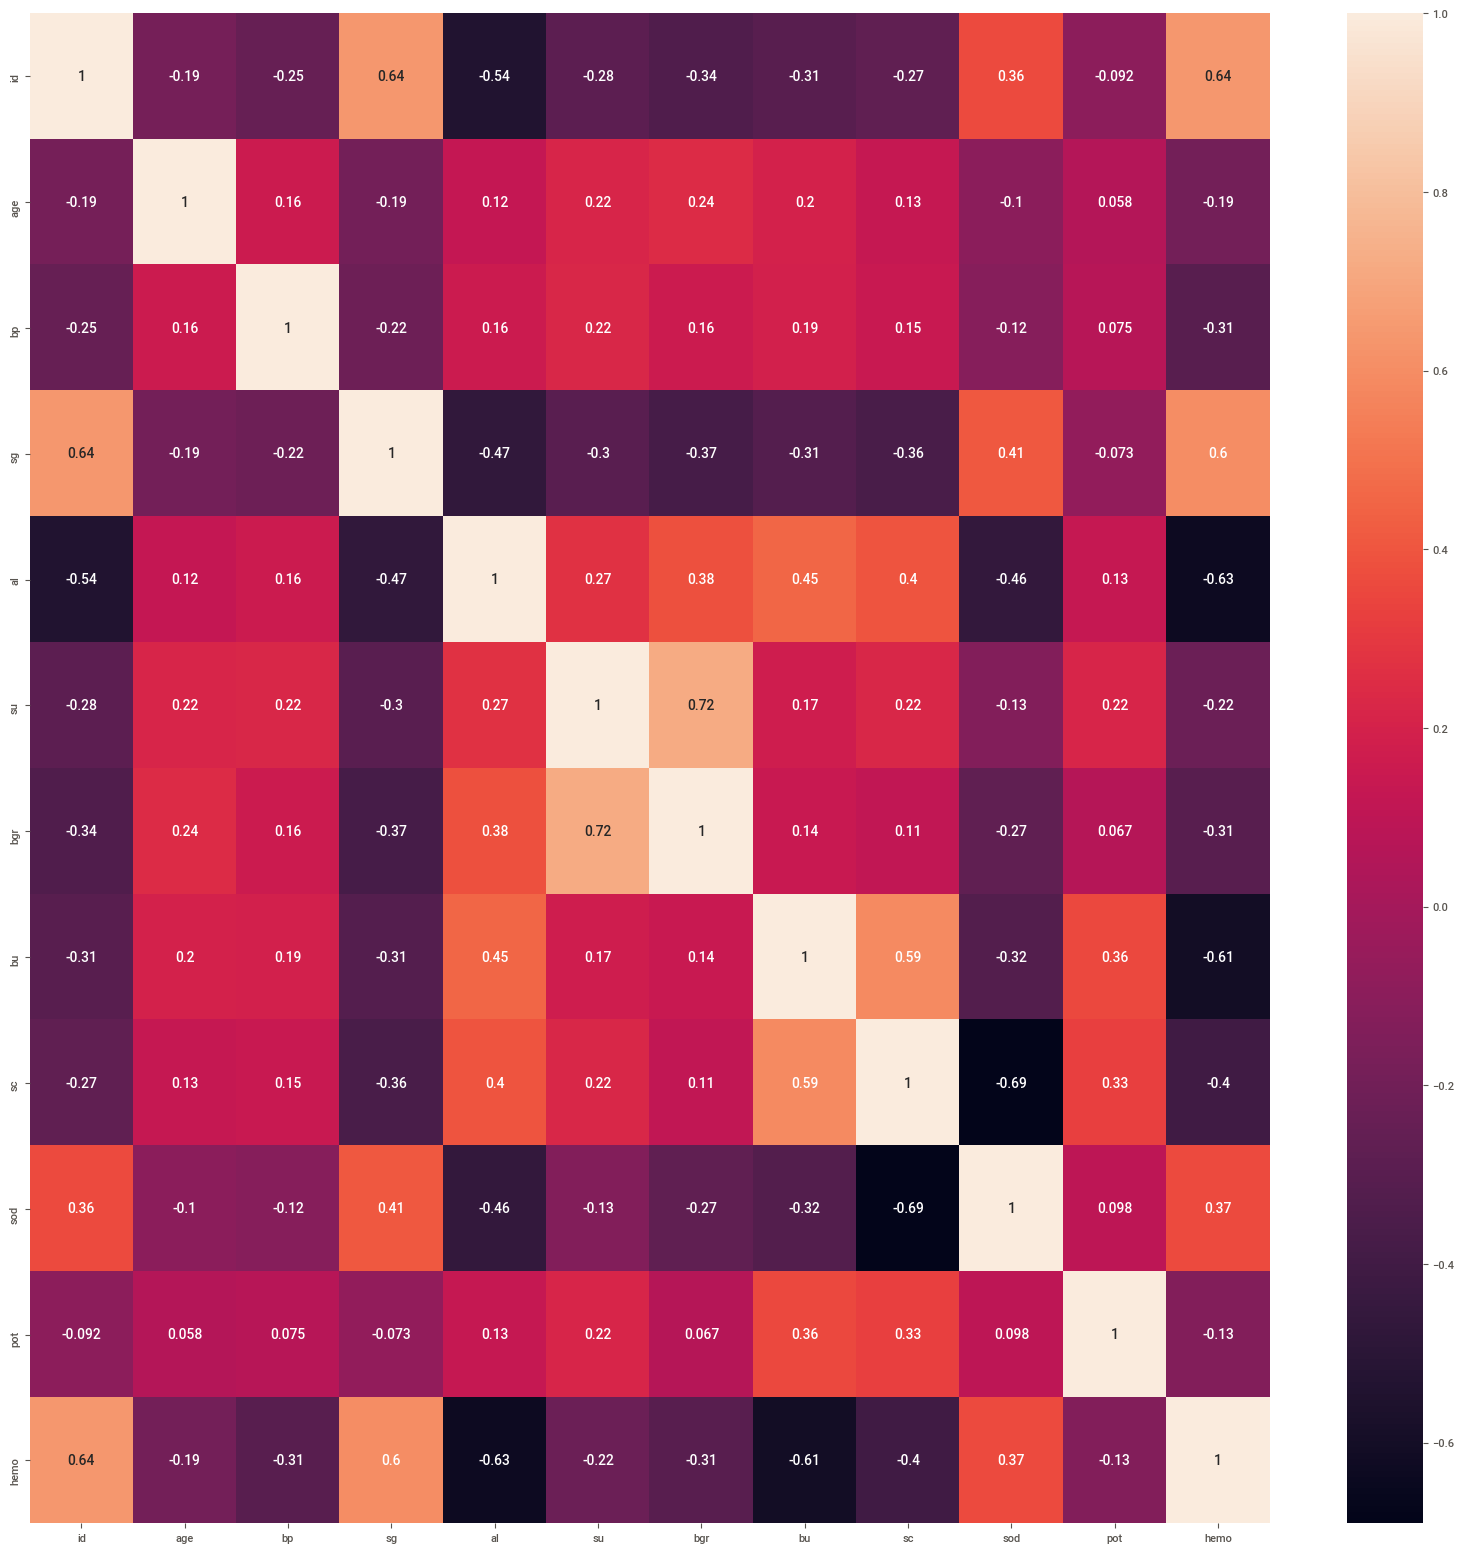

In [11]:
#plotting the correlation and checking which features will help

fig,ax=plt.subplots(figsize=(20,20))
cor=df.corr()
sns.heatmap(cor,annot=True,ax=ax)

In [12]:
#split the data to train and validation

x=clean_df.drop(columns=['classification'],axis=1)
y=clean_df['classification']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=111)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 25)
(40, 25)
(118,)
(40,)


In [13]:
#perform grid search cross validation to find the best parameters for Decision Tree Classifier
model = DecisionTreeClassifier(random_state=7)
model_params = {'criterion':['gini','entropy'],'max_depth':range(3,25),'max_features':range(4,22)}
model_cv = GridSearchCV(model,model_params,cv=5,n_jobs=-1,verbose=True)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 25),
                         'max_features': range(4, 22)},
             verbose=True)

In [14]:
model_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=5, random_state=7)

In [15]:
model_cv.best_score_

1.0

In [16]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 5}

In [17]:
y_pred=model_cv.predict(x_test)

In [18]:
#evaluate the model

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  1]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        30

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40

